In [1]:
import numpy as np

from photutils import CircularAperture
from photutils import CircularAnnulus
from photutils import aperture_photometry
from astropy.io import fits

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.stats import mad_std

import pandas as pd
from statistics import stdev

In [2]:
lst = {'Filter': [],'Total Couonts': [],'BG Counts': [],'Source Counts': [], 'Stat error: N': []}
df = pd.DataFrame(data=lst)

num = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
fltr = ["g","g","g","g","g", "r","r","r","r","r", "i", "i", "i", "i", "i", "z", "z", "z", "z", "z"]


def plot_circle(center, radius):
    x0, y0 = center
    x = [] ; y = []
    for i in range(2*314):
        x += [radius*np.cos(i/100) + x0]
        y += [radius*np.sin(i/100) + y0]
    return x, y

# star 1 = ../data/star1/DES2334+0001_r2587p01_%s_Y3A1_star_135459694_%d.fits
# star 2 = ../data/star2/DES0157+0126_r2624p01_%s_Y3A1_star_261815826_%d.fits
# star 3 = ../data/star3/DES0254+0043_r2674p01_%s_Y3A1_star_328471493_%d.fits
# star 4 = ../data/star4/DES2339+0043_r2587p01_%s_Y3A1_star_138234465_%d.fits
# star 5 = ../data/star5/DES2336-0041_r2587p01_%s_Y3A1_star_136676712_%d.fits


/usr/local/anaconda3-2018/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


   Filter  Total Couonts     BG Counts  Source Counts  Stat error: N
0       g   172791.16051  108450.26448    64340.89603      530.32200
1       g   180277.95312  109344.63931    70933.31381      538.16595
2       g   158114.93910   94866.76071    63248.17839      502.97286
3       g   161530.74424   98054.70685    63476.03740      509.49529
4       g   157822.98639   93064.39385    64758.59254      500.88659
5       r   358421.38144  102029.98948   256391.39196      678.56567
6       r   342274.63843   91461.85045   250812.78798      658.58674
7       r   349412.73373  102451.89302   246960.84071      672.20877
8       r   356076.59394  106152.00666   249924.58728      679.87396
9       r   354741.01428  103470.39692   251270.61735      676.91315
10      i   569477.83369  107798.33348   461679.50021      822.96790
11      i   561088.56525   99755.05893   461333.50631      812.92289
12      i   555426.91326   92902.98664   462523.92662      805.18936
13      i   554867.23542  107373.0

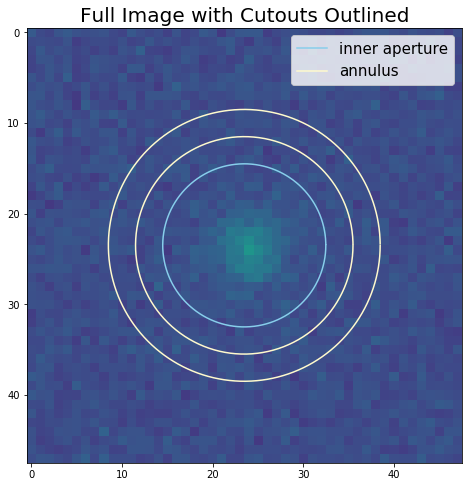

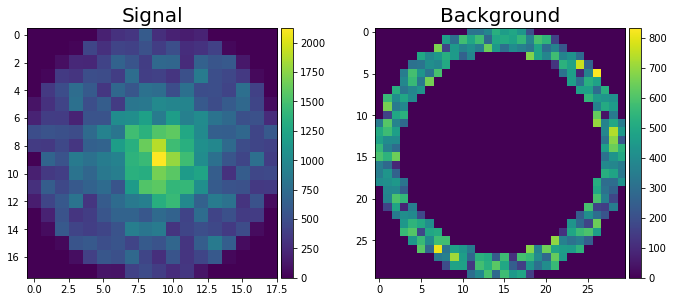

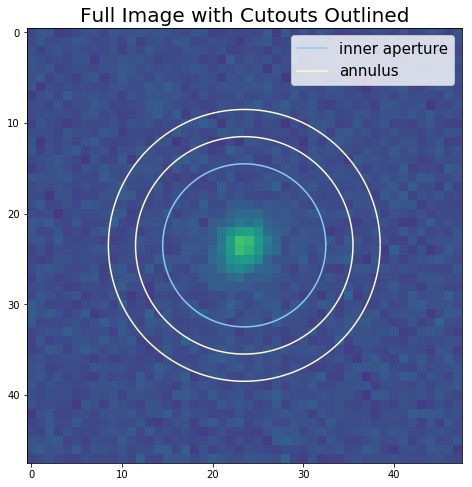

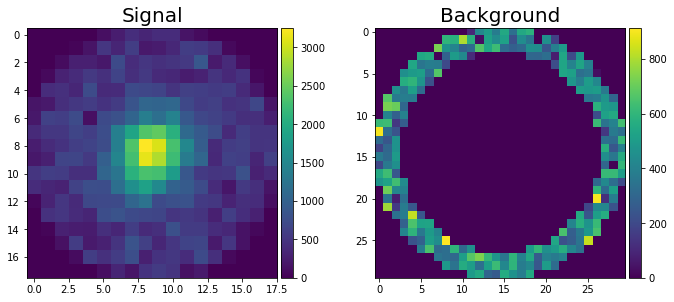

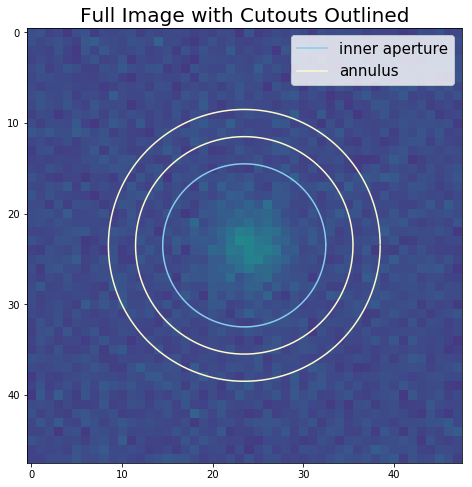

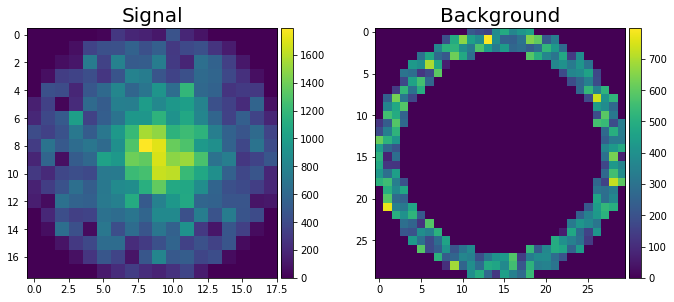

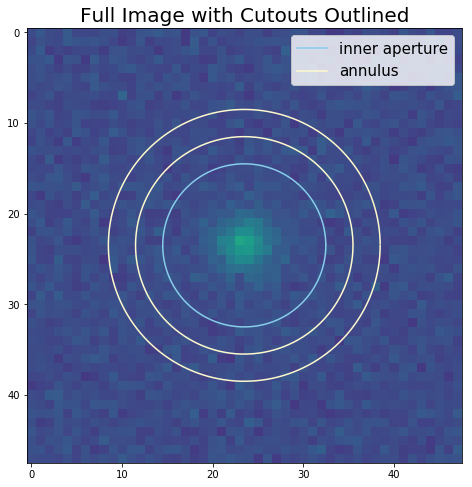

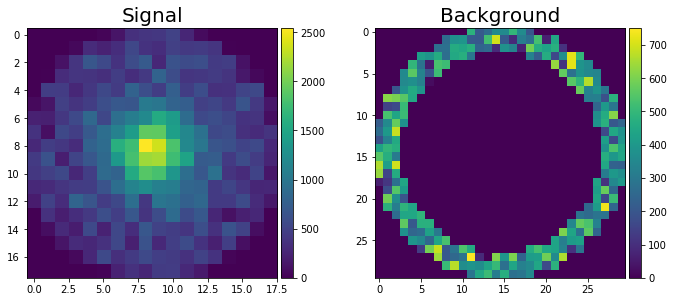

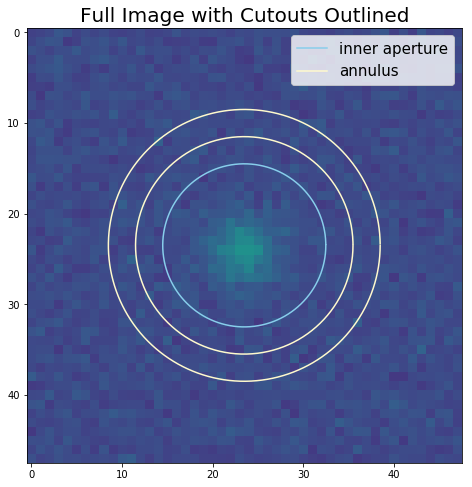

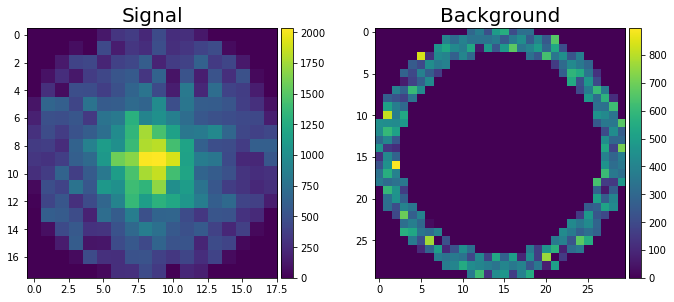

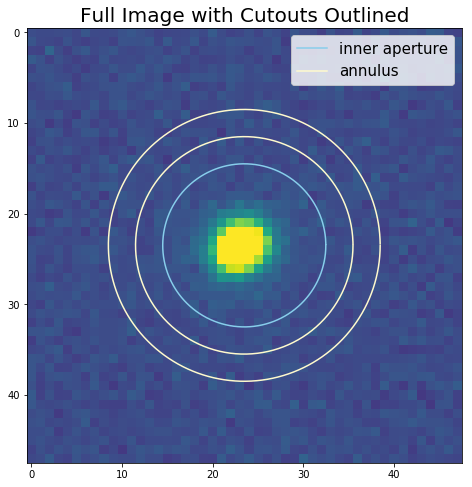

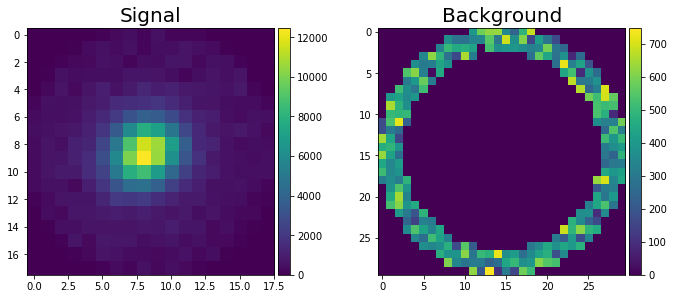

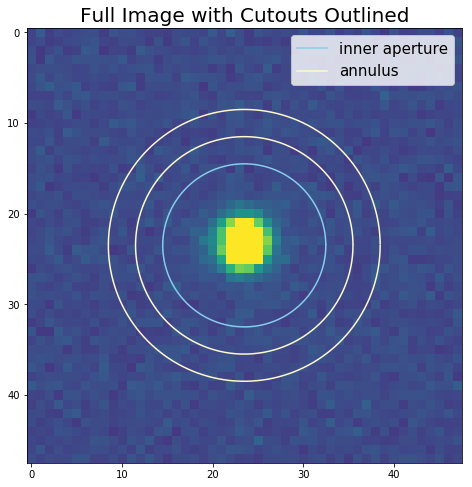

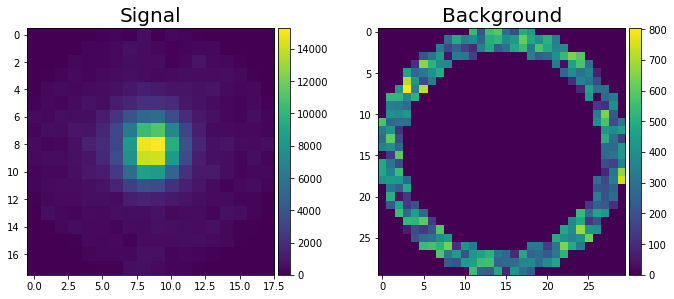

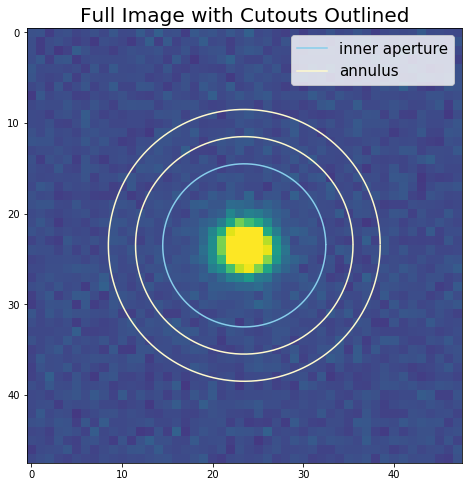

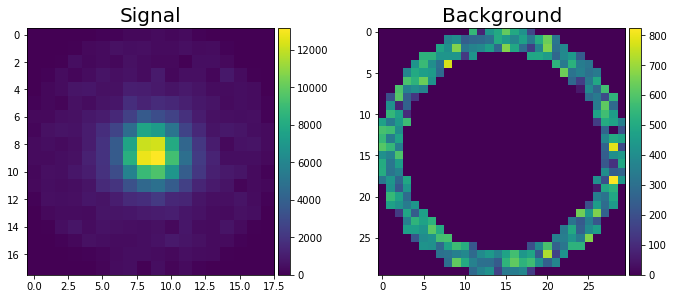

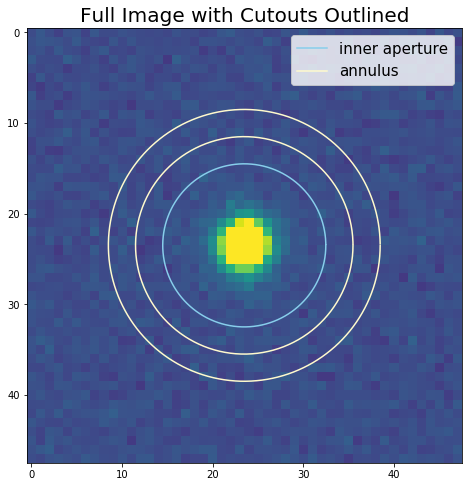

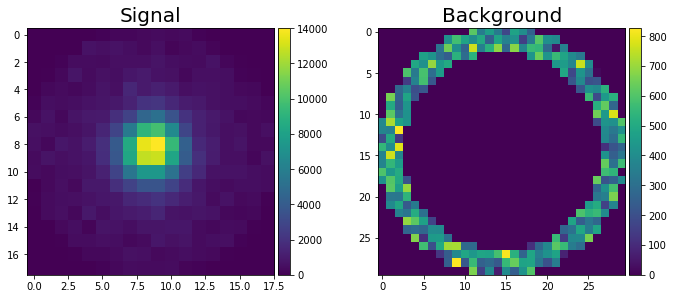

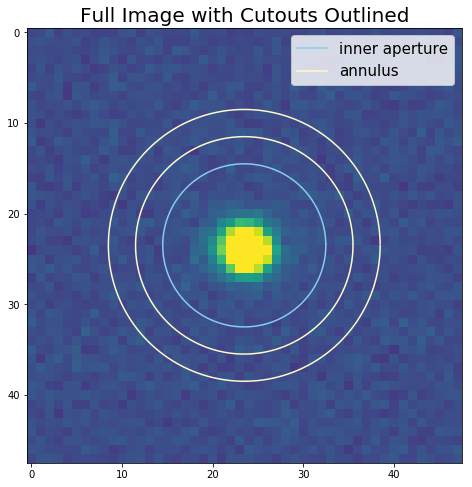

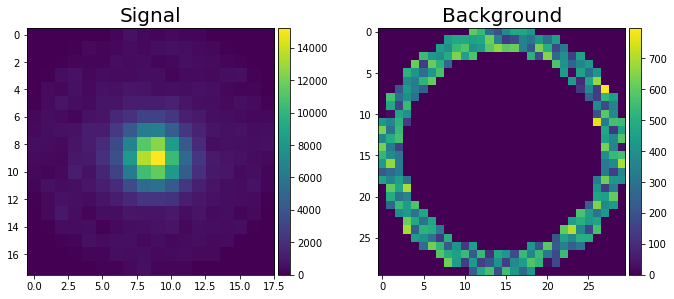

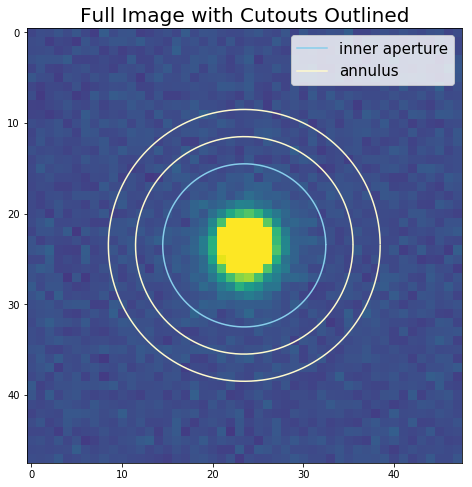

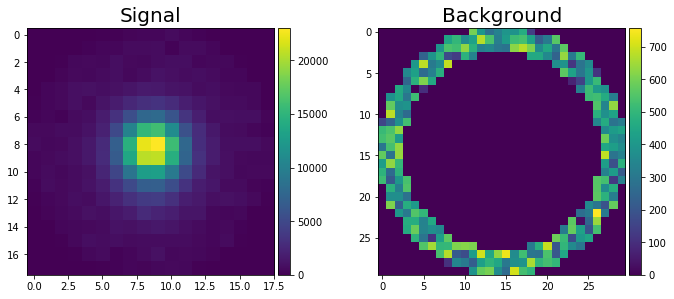

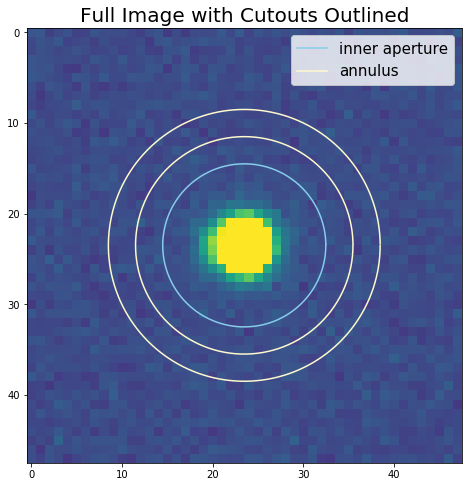

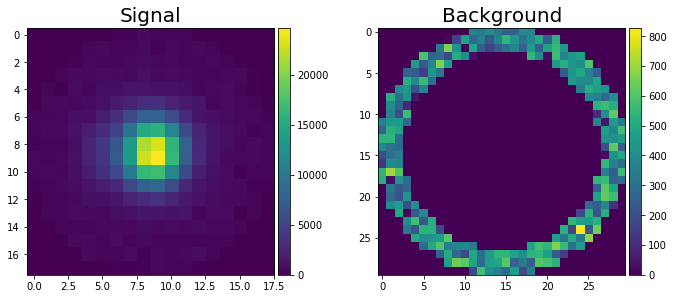

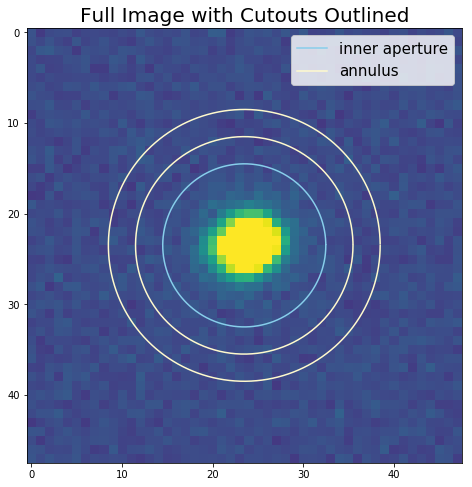

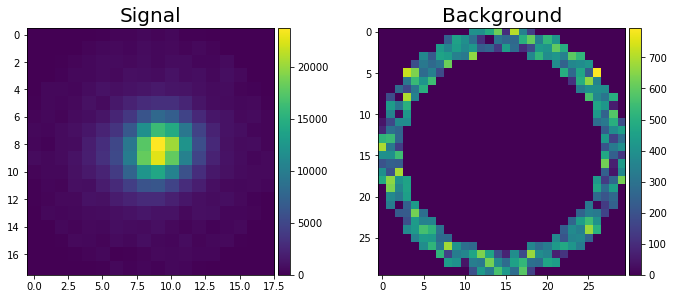

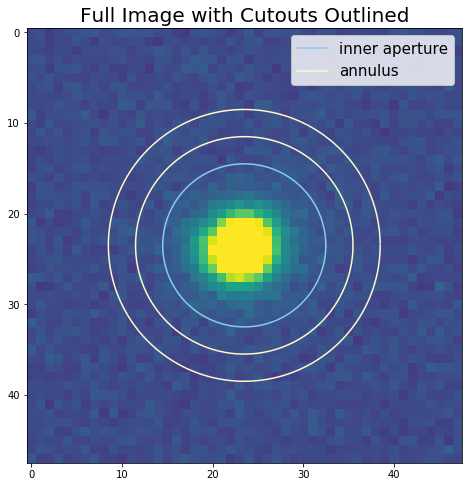

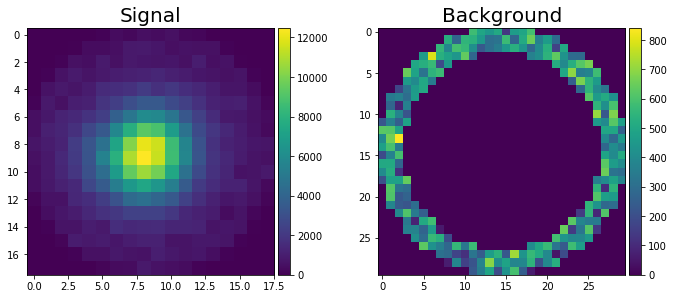

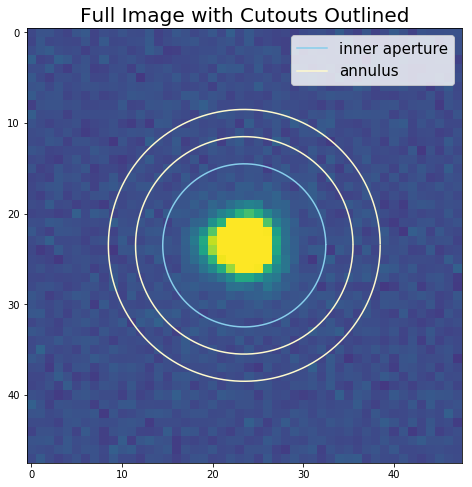

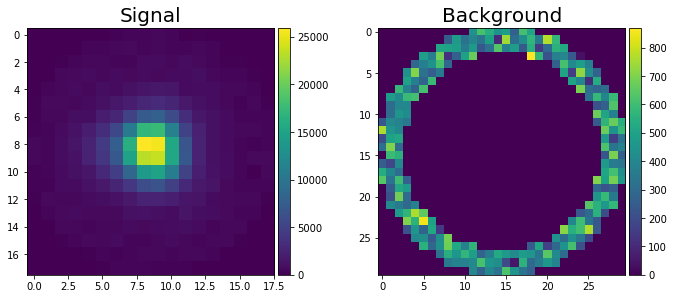

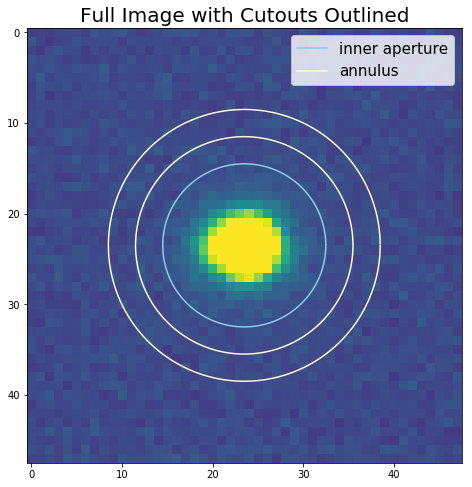

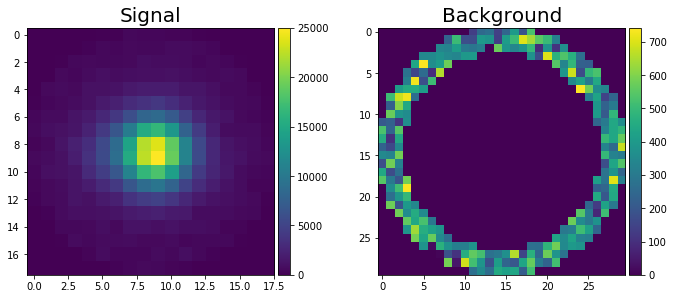

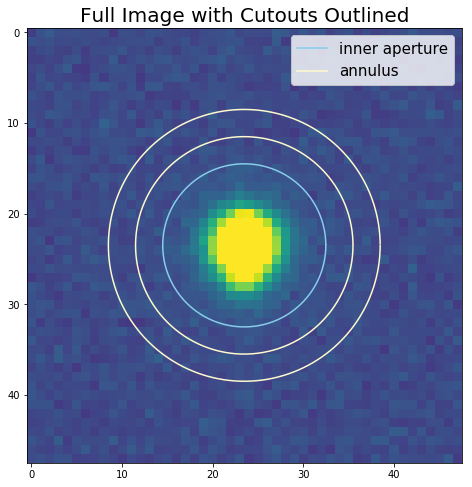

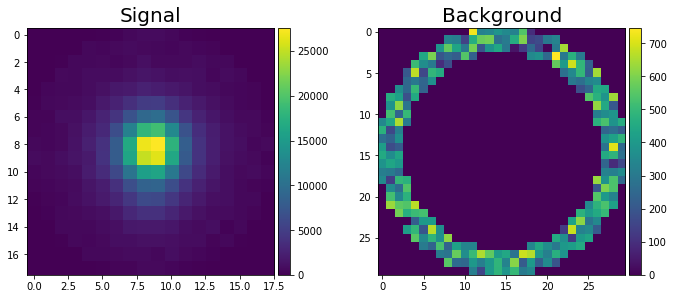

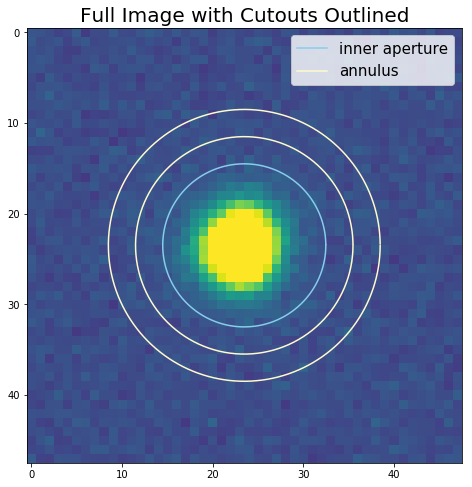

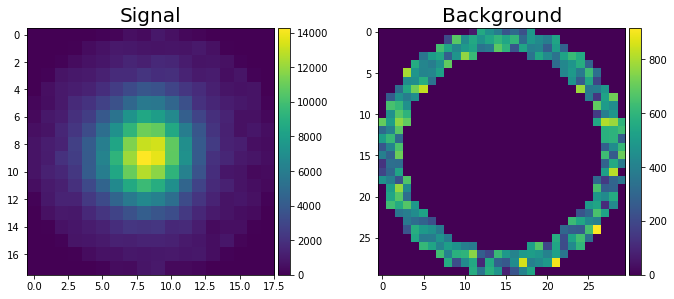

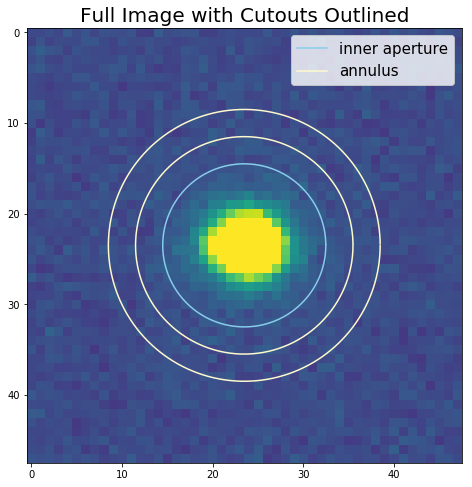

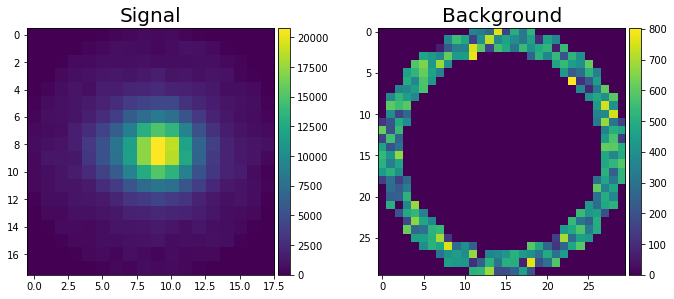

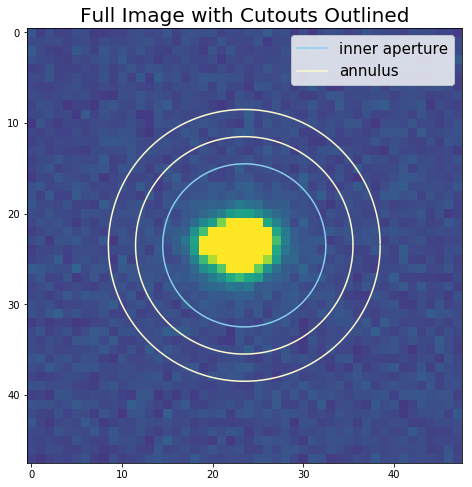

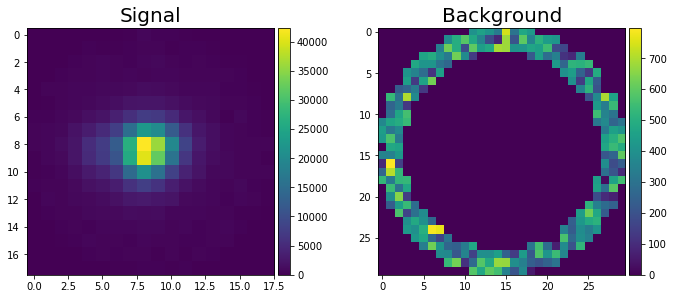

In [3]:
# For each STAR, copy paste the file name, change star # in directory, and make sure to replace filter and image # with 
#  %s and %d respectively
for i in range(0,20):
    image_path = "../data/star4/DES2339+0043_r2587p01_%s_Y3A1_star_138234465_%d.fits"%(fltr[i], num[i])
    file = fits.open(image_path)
    image = file[0]
    image_data = image.data

    x, y = image_data.shape
    x /= 2 ; y /= 2 ; x-=.5 ; y -=.5 #play around with these numbers and see what changes
    ap_radius = 9 #this is the radius of the aperture
    an_radius_in = 12 ; an_radius_out = 15 # this is the inner and outer radius of the annulus
    #keep apatures the same size if possible for same star in same band

    x1, y1 = plot_circle((x, y), ap_radius)         # plot_circle will get the x and y coordinates of the circles
    x2, y2 = plot_circle((x, y), an_radius_in)      # that we are making so we can graph them and check that the 
    x3, y3 = plot_circle((x, y), an_radius_out)     # aperture and annulus are where they're supposed to be.

    fig, axs = plt.subplots(1, 1, figsize=(8, 8))

    plt.imshow(image_data, vmin=-1000, vmax=5000,)
    plt.plot(x1, y1, color='skyblue', label="inner aperture")
    plt.plot(x2, y2, color='lemonchiffon', label="annulus")
    plt.plot(x3, y3, color='lemonchiffon')
    plt.title("Full Image with Cutouts Outlined", fontsize=20)
    plt.legend(fontsize=15)

    positions = [(x, y)]
    aperture = CircularAperture(positions, r=ap_radius)
    annulus = CircularAnnulus(positions, r_in=an_radius_in, r_out=an_radius_out)

    #get the data in the aperture (for plotting)
    aperture_masks = aperture.to_mask()
    aperture_data = aperture_masks[0].multiply(image_data)

    #get the data in the annulus (for plotting)
    annulus_masks = annulus.to_mask(method='center')
    annulus_data = annulus_masks[0].multiply(image_data)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
    im1=ax1.imshow(aperture_data)#, vmin=0, vmax=20000)
    im2=ax2.imshow(annulus_data)#, vmin=0, vmax=20000)

    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="5%", pad=0.05)
    ax1.set_title("Signal", fontsize=20)

    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    ax2.set_title("Background", fontsize=20)

    fig.colorbar(im1, ax=ax1, cax=cax1)
    fig.colorbar(im2, ax=ax2, cax=cax2)
    fig.tight_layout(pad=3.0)

    apers = [aperture, annulus]
    phot_table = aperture_photometry(image_data, apers)

    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'  # for consistent table output

    bkg_mean = phot_table['aperture_sum_1'] / annulus.area
    bkg_sum = phot_table['aperture_sum_1']
    data_mean = phot_table['aperture_sum_0'] / aperture.area
    data_sum = phot_table['aperture_sum_0']
    

    M = data_sum[0]
    B = bkg_sum[0]
    As = aperture.area
    Ab = annulus.area
    N = round(M - B * As/Ab, 5) # source counts-bkgd counts
    stat_sigma = round((M+B*(As/Ab)**2)**0.5, 5)
   
    
    # S=N source counts
    file.close()

    df.loc[i] = [fltr[i], round(M,5), round(B, 5), N, stat_sigma]
print(df)

In [4]:
# Un-comment this to make new file after you are happy with your images. Change star #!
#df.to_csv('star_4.csv', index=None, sep=',', mode='w') 


In [5]:
print(As, Ab)

254.46900494077323 254.46900494077323
